In [0]:
# 匯入「房屋txt檔」和 『第三方函式庫』到 Colab

from google.colab import files   
uploaded = files.upload()       # 匯入房屋txt檔
uploaded = files.upload()       # 匯入第三方函式庫 keras_lite_convertor

In [0]:
# 讀取 house.txt 檔案, 並得出特徵和標籤

import keras_lite_convertor as kc

path_name = 'house.txt'  # 檔案路徑
Data_reader = kc.Data_reader(path_name, mode='regression')  # 指定讀檔模式(regression適用於迴歸預測)
data, label = Data_reader.read(random_seed=12)  # 將檔案讀到的 5 種資料分為『特徵』和『標籤』, 並設定亂數種子為 12

In [0]:
# 資料預處理

# 取資料中的 90% 當作訓練集
split_num = int(len(data)*0.9) 
train_data = data[:split_num]        # 訓練用資料
train_label = label[:split_num]      # 訓練用標籤  

# 正規化
mean = train_data.mean()             # 訓練資料的平均數
data -= mean                         # data 減掉平均值
std = train_data.std()               # 訓練資料的標準差
data /= std                          # data 除以平均值

new_label = label/max(label)         # 將 label範圍落在 0~1 (label正規化)

In [0]:
# 訓練集、驗證集、測試集的資料形狀

# 訓練集
train_data = data[:split_num]               # 訓練用資料
print(train_data.shape)    
train_label = new_label[:split_num]         # 訓練用標籤

# 驗證集
validation_data=data[split_num:-30]         # 驗證用資料
print(validation_data.shape)
validation_label=new_label[split_num:-30]   # 驗證用標籤

# 測試集
test_data=data[-30:]                        # 測試用資料, 30筆
print(test_data.shape)
test_label=new_label[-30:]                  # 測試用標籤

(620, 4)
(39, 4)
(30, 4)


In [0]:
# 建立神經網路架構

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()        # 建構網路模型                            
model.add(Dense(20,activation='relu',   # 增加一層神經層, 使用 ReLU 激活函數, 輸入層有4個輸入特徵
                input_shape=(4,))) 
model.add(Dense(20,activation='relu'))  # 增加一層神經層, 使用 ReLU 激活函數
model.add(Dense(1))                     # 增加輸出為 1 的輸出層

In [0]:
# 編譯及訓練模型

# 編譯模型
model.compile(optimizer='adam',loss='mse',metrics=['mae'])              
history=model.fit(train_data,train_label,                               # 訓練集
                  validation_data=(validation_data,validation_label),   # 驗證集
                  epochs=200)                                           # 訓練週期

Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 0.0589 - mae: 0.1825 - val_loss: 0.0150 - val_mae: 0.0977
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0125 - mae: 0.0824 - val_loss: 0.0052 - val_mae: 0.0505
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0067 - mae: 0.0617 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0052 - mae: 0.0522 - val_loss: 0.0030 - val_mae: 0.0438
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0047 - mae: 0.0495 - val_loss: 0.0029 - val_mae: 0.0424
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0045 - mae: 0.0485 - val_loss: 0.0032 - val_mae: 0.0457
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0488 - val_loss: 0.0029 - val_mae: 0.0412
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0043 - m

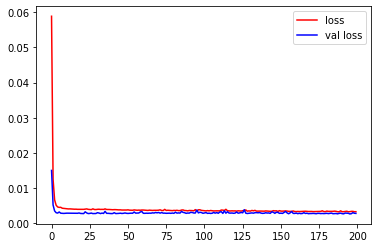

In [0]:
# 查看損失值

import matplotlib.pyplot as plt

plt.plot(history.history['loss'],"r",      # 訓練資料的損失值
         label='loss')   
plt.plot(history.history['val_loss'],"b",  # 驗證資料的損失值  
         label='val loss')  
plt.legend()  # 顯示標籤
plt.show()    # 顯示圖片

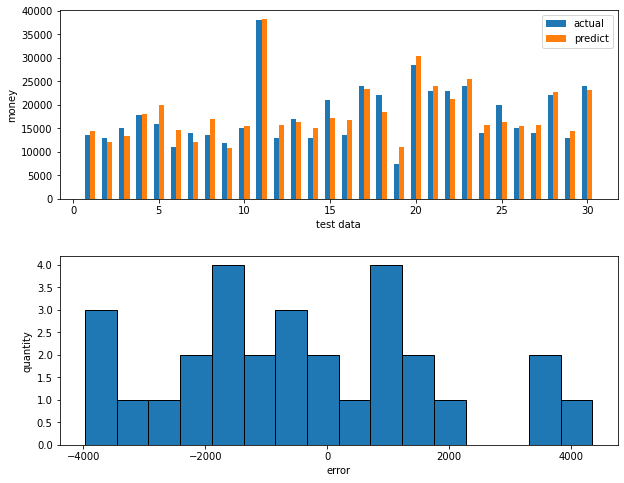

In [0]:
# 資料比較圖

import numpy as np

plt.figure(figsize=(10,8))          # 定義一個視窗(10,8 為視窗大小)
plt.subplots_adjust(hspace = 0.3)   # 調整兩張圖的間距

# 實際值-預測值(*max(label)表示恢復原始值)
error=test_label.reshape(30,1)*max(label)-model.predict(test_data)*max(label)
# 把誤差分成 15 等份, 求出每一等份的長度
step=(max(error)-min(error))/15
# 寫出每一等份的值    
interval=[i for i in range(int(min(error)),
                           int(max(error))+int(step),
                           int(step))]

# 實際預測比較圖
width = 0.3
plt.subplot(2,1,1)      # 第一張圖位於視窗裡的位置 (2列1行的第二個位置 - 上)
plt.xlabel("test data") # x軸名稱
plt.ylabel("money")                             # y軸名稱
plt.bar(np.linspace(1,30,30)-width/2,           # 實際值
        (test_label*max(label)).reshape(30),
        width=width, label='actual')                
plt.bar(np.linspace(1,30,30)+width/2,           # 預測值
        (model.predict(test_data)*max(label)).reshape(30),
        width=width, label='predict') 

plt.legend()

# 誤差分布圖
plt.subplot(2,1,2)      # 第二張圖位於視窗裡的位置 (2列1行的第二個位置 - 下)
plt.xlabel("error")     # x軸名稱
plt.ylabel("quantity")  # y軸名稱
plt.hist(error,interval,linewidth=1,edgecolor='black')   #顯示

plt.show()        # 將圖片顯示出來